<a href="https://colab.research.google.com/github/mollah2022/Neural-Network/blob/main/Mid_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 40.8297 - mae: 4.7844 - val_loss: 53.3717 - val_mae: 5.8107
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 40.8725 - mae: 4.7425 - val_loss: 49.7037 - val_mae: 5.5405
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 34.2127 - mae: 4.2097 - val_loss: 44.6017 - val_mae: 5.1326
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30.4698 - mae: 3.8558 - val_loss: 37.0209 - val_mae: 4.5195
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24.9179 - mae: 3.4062 - val_loss: 27.2261 - val_mae: 3.6922
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.0683 - mae: 2.6452 - val_loss: 17.2641 - val_mae: 2.8067
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.3080 - mae: 2.3353 - val_loss: 9.2142 - val_mae: 2.1643
Epoch 8/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.1687 - mae: 1.9457 - val_loss: 4.8822 - val_mae: 1.7675
Epoch 9/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/s

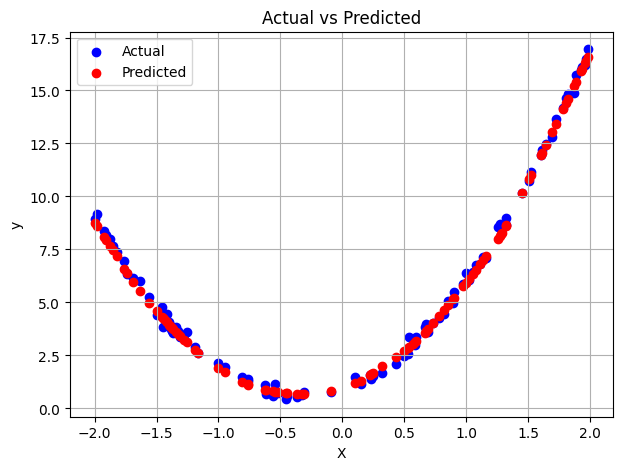

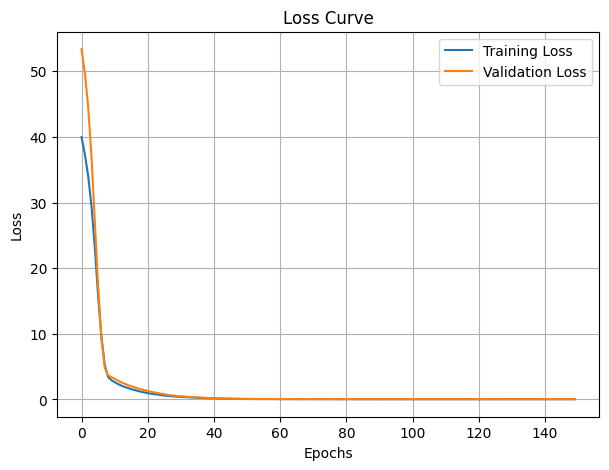

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,261 (32.27 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,508 (21.52 KB)

In [1]:
# 1. প্রয়োজনীয় লাইব্রেরি ইমপোর্ট
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# 2. ডামি ডেটা তৈরি করি (একটা সিম্পল ফাংশনাল রিলেশনশিপ)
X = np.linspace(-2, 2, 500)
y = 3*X**2 + 2*X + 1 + np.random.randn(*X.shape) * 0.2  # কিছু noise যোগ করেছি

# 3. ট্রেন টেস্ট ভাগ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model তৈরি করা (ANN)
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),  # Hidden Layer 1
    keras.layers.Dense(32, activation='relu'),                   # Hidden Layer 2
    keras.layers.Dense(16, activation='relu'),                   # Hidden Layer 3
    keras.layers.Dense(1)                                        # Output Layer
])

# 5. Model কম্পাইল করা
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 6. Model ট্রেনিং
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test))

# 7. মডেল প্রেডিকশন
y_pred = model.predict(X_test)

# 8. Scatter Plot (Actual vs Prediction)
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# 9. Loss Plot
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 10. Model summary দেখা
model.summary()
